In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
print(tf. __version__)

2.18.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
X, y = df.drop('target', axis=1), df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
adb.fit(X_train_scaled, y_train)

AdaBoostClassifier()

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
models = {
    "XGBClassifier": xgb,
    "Gradient Boosting": gradient_boosting,
    "KNN": knn,
    "Logistic Regression": logistic_regression,
    "SVC": svc
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled if name in ["XGBClassifier", "Gradient Boosting","KNN", "Logistic Regression", "SVC"] else X_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 55)

XGBClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

-------------------------------------------------------
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       150
           1       0.96      0.97      0.97       158

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308

-------------------------------------------------------
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       150
           1       0

XGBClassifier Confusion Matrix:
[[150   0]
 [  3 155]]


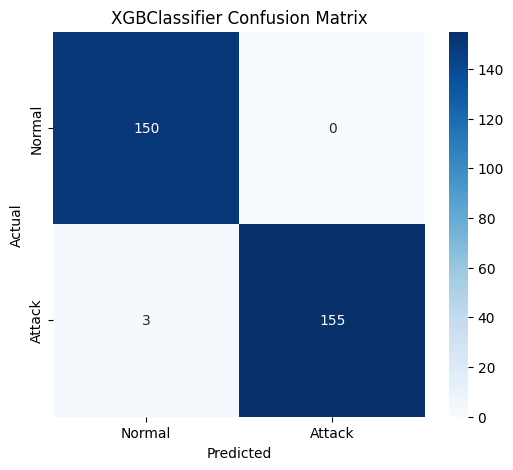

Gradient Boosting Confusion Matrix:
[[144   6]
 [  5 153]]


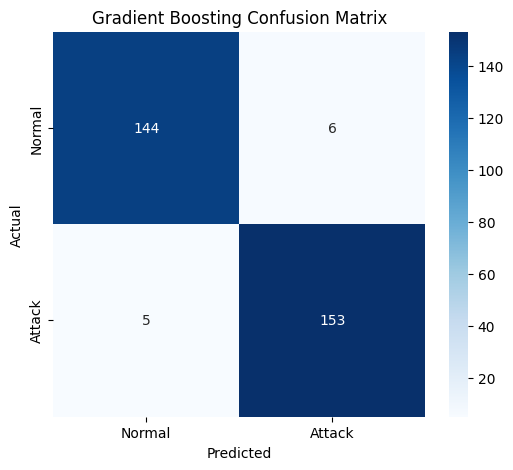

KNN Confusion Matrix:
[[133  17]
 [ 24 134]]


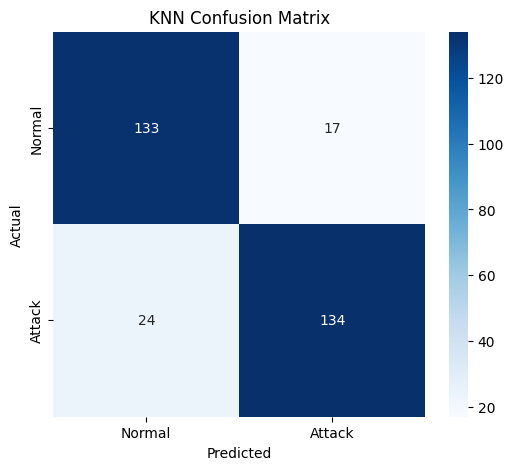

Logistic Regression Confusion Matrix:
[[111  39]
 [ 17 141]]


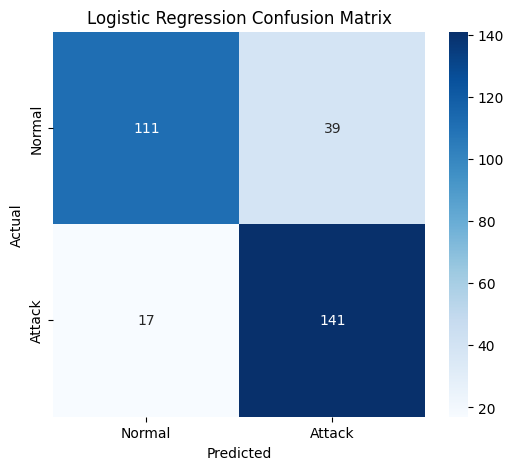

SVC Confusion Matrix:
[[136  14]
 [ 15 143]]


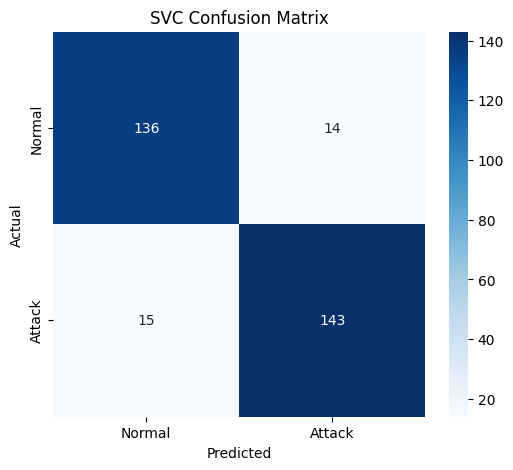

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "XGBClassifier": xgb,
    "Gradient Boosting": gradient_boosting,
    "KNN": knn,
    "Logistic Regression": logistic_regression,
    "SVC": svc
}

# Loop through each model, predict, and display the confusion matrix
for name, model in models.items():
    y_pred = model.predict(X_test_scaled if name in ["XGBClassifier", "Gradient Boosting", "KNN", "Logistic Regression", "SVC"]
                           else X_test)
    print(f"{name} Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

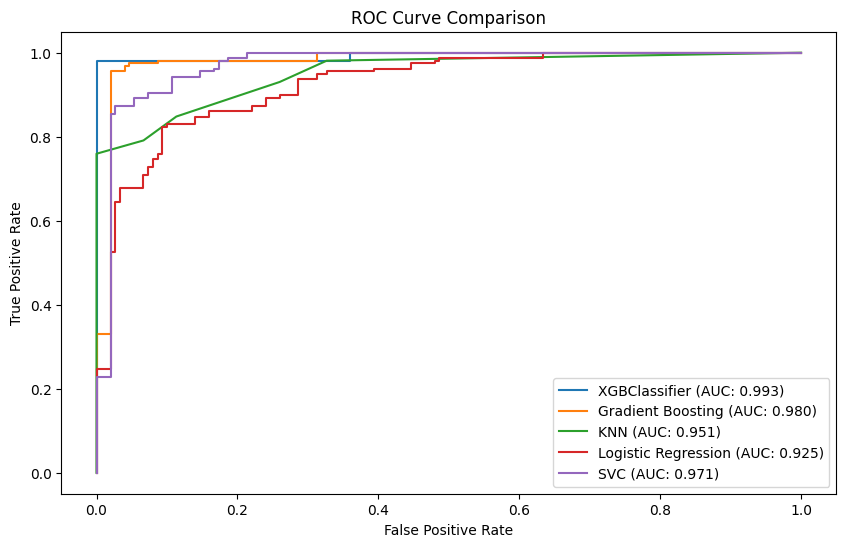

In [ ]:
plt.figure(figsize=(10, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_scaled if name in ["XGBClassifier", "Gradient Boosting", "KNN", "Logistic Regression", "SVC"] else X_test)[:, 1]
    else:
        y_pred_prob = model.decision_function(X_test_scaled if name in ["XGBClassifier", "Gradient Boosting","KNN", "Logistic Regression", "SVC"] else X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC: {roc_auc_score(y_test, y_pred_prob):.3f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve Comparison")
plt.show()

In [ ]:
pip install shap

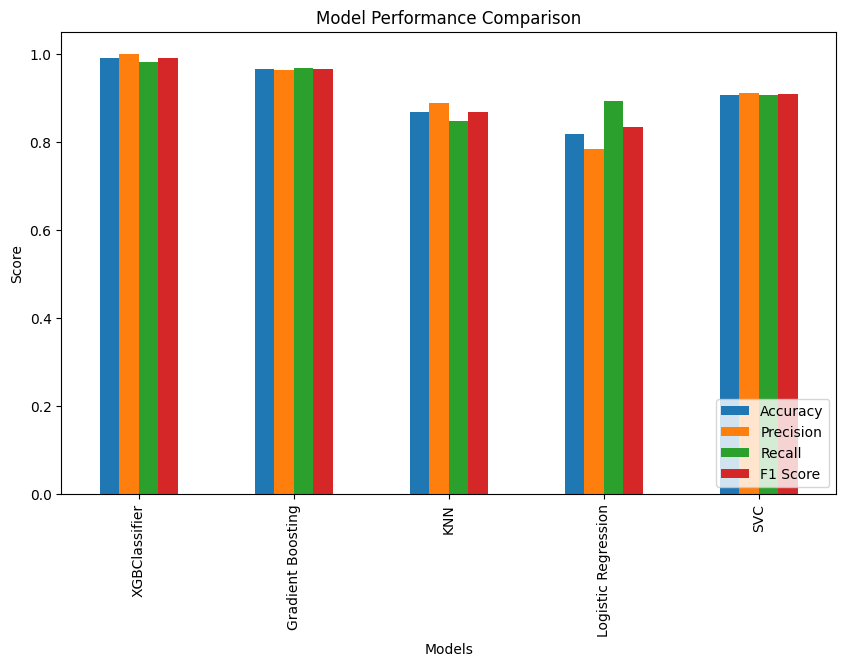

In [ ]:
def plot_model_comparison(models, X_test, X_test_scaled, y_test):
    metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}
    model_names = []

    for name, model in models.items():
        y_pred = model.predict(X_test_scaled if name in ["XGBClassifier", "Gradient Boosting", "KNN", "Logistic Regression", "SVC"] else X_test)
        metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["Precision"].append(precision_score(y_test, y_pred))
        metrics["Recall"].append(recall_score(y_test, y_pred))
        metrics["F1 Score"].append(f1_score(y_test, y_pred))
        model_names.append(name)

    metrics_df = pd.DataFrame(metrics, index=model_names)
    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.xlabel("Models")
    plt.legend(loc="lower right")
    plt.show()

plot_model_comparison(models, X_test, X_test_scaled, y_test)

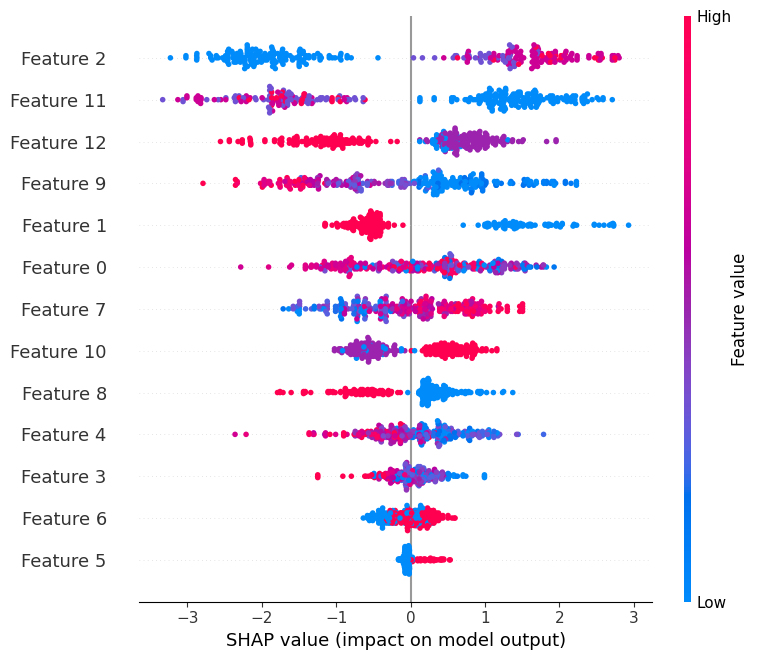

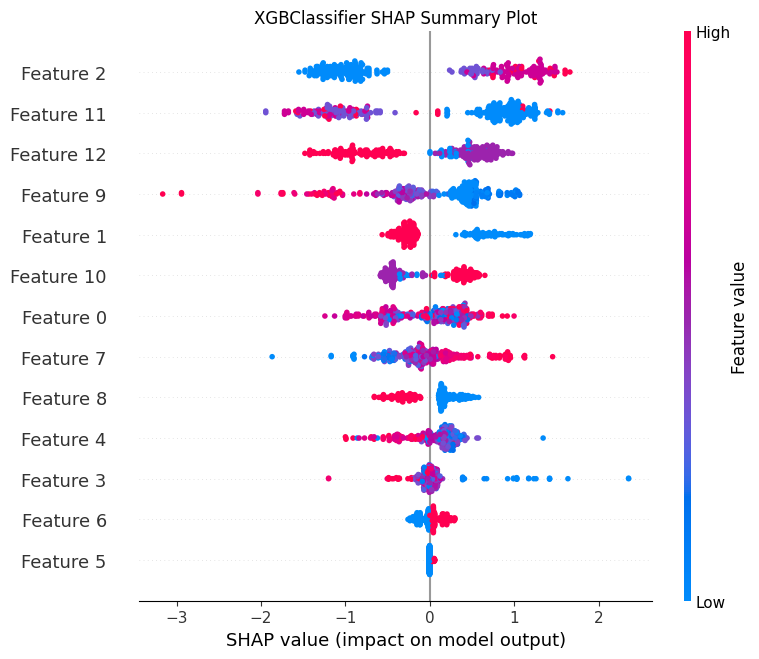

  0%|          | 0/308 [00:00<?, ?it/s]

In [ ]:
import shap
import matplotlib.pyplot as plt

# Loop through each model and calculate SHAP values
for name, model in models.items():
    try:
        # Determine the appropriate SHAP explainer
        if name in ["XGBClassifier", "Gradient Boosting"]:  # Tree-based models
            explainer = shap.TreeExplainer(model)
            data_to_use = X_test_scaled
        else:  # Non-tree-based models, including KNN
            explainer = shap.KernelExplainer(model.predict, X_test_scaled)
            data_to_use = X_test_scaled

        # Calculate SHAP values
        shap_values = explainer.shap_values(data_to_use)

        # Plot SHAP summary plot for the model
        shap.summary_plot(shap_values, data_to_use)
        plt.title(f"{name} SHAP Summary Plot")

    except Exception as e:
        print(f"An error occurred while generating SHAP values for {name}: {e}")